## Constructing Hurricane Paths

In [152]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from urllib.request import urlopen
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import glob
import random
import base64
from PIL import Image
from io import BytesIO

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [235]:
baseurl = 'http://50.206.172.193/hurricane/index.php'

In [236]:
page = urlopen(baseurl)

In [237]:
# parse the html using beautiful soup and store in variable `soup`
soup = BeautifulSoup(page, 'html.parser')

In [238]:
# Take out the <tr> of row_hover_bg and get its value
data_table = soup.findAll('table')

In [239]:
len(data_table)

4

In [14]:
data_table[0]

<table>
<tr>
<th width="33%"><a href="atlantic/index.php">Atlantic</a></th>
<th width="33%"><a href="e_pacific/index.php">East Pacific</a></th>
<th width="33%"><a href="w_pacific/index.php">West Pacific</a></th>
</tr>
<tr>
<td valign="top" width="33%">
<b>From TPC Advisories:<br/>
<a href="atlantic/2018/index.php">2018</a><br/>
<a href="atlantic/2017/index.php">2017</a><br/>
<a href="atlantic/2016/index.php">2016</a><br/>
<a href="atlantic/2015/index.php">2015</a><br/>
<a href="atlantic/2014/index.php">2014</a><br/>
<a href="atlantic/2013H/index.php">2013</a><br/>
<a href="atlantic/2012H/index.php">2012</a><br/>
<a href="atlantic/2011H/index.php">2011</a><br/>
<a href="atlantic/2010H/index.php">2010</a><br/>
<a href="atlantic/2009H/index.php">2009</a><br/>
<a href="atlantic/2008H/index.php">2008</a><br/>
<a href="atlantic/2007H/index.php">2007</a><br/>
<a href="atlantic/2006H/index.php">2006</a><br/>
<a href="atlantic/2005H/index.php">2005</a><br/>
<a href="atlantic/2004H/index.php">20

In [240]:
table = data_table[0]
header = table.findAll('th',attrs={'width':'33%'})

In [241]:
len(header)

6

In [242]:
headers = [header[i].text for i in range(len(header))]
headers

['Atlantic',
 'East Pacific',
 'West Pacific',
 'South Pacific',
 'South Indian',
 'North Indian']

In [243]:
href_list = [header[i].findAll('a')[0].get('href') for i in range(len(header))]
sh = [x.split('/')[0] for x in href_list]
sh

['atlantic', 'e_pacific', 'w_pacific', 's_pacific', 's_indian', 'n_indian']

In [244]:
sh_dict = dict((x,y) for x,y in zip(headers,sh))
sh_dict['South Indian']

's_indian'

In [269]:
hlinks = table.findAll('td',attrs={'width':'33%'})

In [276]:
s = hlinks[8].findAll('a')
[str(x).split('"')[1] for x in s]

['n_indian/2018/index.php',
 'n_indian/2017/index.php',
 'n_indian/2016/index.php',
 'n_indian/2015/index.php',
 'n_indian/2014/index.php',
 'n_indian/2013/index.php',
 'n_indian/2012H/index.php',
 'n_indian/2011H/index.php',
 'n_indian/2010H/index.php',
 'n_indian/2009H/index.php',
 'n_indian/2008H/index.php',
 'n_indian/2007H/index.php',
 'n_indian/2006H/index.php',
 'n_indian/2005H/index.php',
 'n_indian/2004H/index.php',
 'n_indian/2003H/index.php',
 'n_indian/2002H/index.php',
 'n_indian/2001H/index.php',
 'n_indian/2000H/index.php']

In [279]:
hlinks2 = table.findAll('td',attrs={'width':'33%'})
hlinks = {}
for i in [0,1,2,6,7,8]:
    s = hlinks2[i].findAll('a')
    y = [str(x).split('"')[1] for x in s]
    if i < 3:
        hlinks[headers[i]] = ['http://50.206.172.193/hurricane/'+d for d in y]
    else:
        hlinks[headers[i-3]] = ['http://50.206.172.193/hurricane/'+d for d in y]

In [280]:
hlinks['Atlantic']

['http://50.206.172.193/hurricane/atlantic/2018/index.php',
 'http://50.206.172.193/hurricane/atlantic/2017/index.php',
 'http://50.206.172.193/hurricane/atlantic/2016/index.php',
 'http://50.206.172.193/hurricane/atlantic/2015/index.php',
 'http://50.206.172.193/hurricane/atlantic/2014/index.php',
 'http://50.206.172.193/hurricane/atlantic/2013H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2012H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2011H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2010H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2009H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2008H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2007H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2006H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2005H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2004H/index.php',
 'http://50.206.172.193/hurricane/atlantic/2003H/index.php',
 'http://50.206.172.193/hurri

In [281]:
hlinks['North Indian'][-5:]

['http://50.206.172.193/hurricane/n_indian/2004H/index.php',
 'http://50.206.172.193/hurricane/n_indian/2003H/index.php',
 'http://50.206.172.193/hurricane/n_indian/2002H/index.php',
 'http://50.206.172.193/hurricane/n_indian/2001H/index.php',
 'http://50.206.172.193/hurricane/n_indian/2000H/index.php']

In [172]:
def display_an_image(link):
    response = requests.get(link)
    img = Image.open(BytesIO(response.content))
    return img

In [313]:
def hurricane_dict(region,year):
    link = [l for l in hlinks[region] if str(year) in l][0]
    page = urlopen(link)
    soup = BeautifulSoup(page, 'html.parser')
    table = soup.findAll('table',attrs={'border':'0'})
    hnames = table[0].findAll('td',attrs={'width':'250'})
    hnames = [hnames[i].text.strip() for i in range(len(hnames))]
    hnames = hnames[1:]
    hnames_tail = [x.split(' ')[-1] for x in hnames]
    Dates = table[0].findAll('td',attrs={'width':'125'})
    Dates = [Dates[i].text.strip() for i in range(len(Dates))]
    Dates = Dates[1:]
    Miscs = table[0].findAll('td',attrs={'width':'40'})
    Miscs = [Miscs[i].text.strip() for i in range(len(Miscs))]
    Miscs = Miscs[3:]
    Winds = Miscs[0:len(Miscs):3]
    Pressures = Miscs[1:len(Miscs):3]
    Category = Miscs[2:len(Miscs):3]
    Category = [x for x in Category]
    link_front = link[:-9]
    photo_links = [link_front+'/'+x+'/track.gif' for x in hnames_tail]
    data_links = [link_front+'/'+x+'/track.dat' for x in hnames_tail]
    df = []
    for i in range(len(data_links)):
        try:
            page = urlopen(data_links[i])
            soup = BeautifulSoup(page, 'html.parser')
            txt = soup.text.split('\n')
            txt_header = txt[2].split(' ')
            txt_content = txt[3:]
            txt_header = [x for x in txt_header if len(x) > 0]
            txt_content = [x for x in txt_content if len(x) > 0]
            txt_c = []
            for x in txt_content:
                y = x.split(' ')
                y = [s for s in y if len(s) > 0]
                if len(y) > 7:
                    txt_c.append(y[:-2]+[y[-2]+' '+y[-1]])
                else:
                    txt_c.append(y)
            df1 = pd.DataFrame(txt_c)
            df1.columns = txt_header
            df.append(df1)
        except:
            df.append(pd.DataFrame())
    
    hd = {x1:{'Date':x2,'Wind':x3,'Pressure':x4,'Category':x5,'photo':x6,'Data':x7} for x1,x2,x3,x4,x5,x6,x7 in zip(hnames,Dates,Winds,Pressures,Category,photo_links,df)}
    return hd

In [314]:
hd = hurricane_dict('Atlantic',2012)

In [315]:
hd.keys()

dict_keys(['Tropical Storm ALBERTO', 'Tropical Storm BERYL', 'Hurricane-1 CHRIS', 'Tropical Storm DEBBY', 'Hurricane-1 ERNESTO', 'Tropical Storm FLORENCE', 'Hurricane-2 GORDON', 'Tropical Storm HELENE', 'Hurricane-1 ISAAC', 'Tropical Storm JOYCE', 'Hurricane-2 KIRK', 'Hurricane-1 LESLIE', 'Hurricane-3 MICHAEL', 'Hurricane-1 NADINE', 'Tropical Storm OSCAR', 'Tropical Storm PATTY', 'Hurricane-1 RAFAEL', 'Hurricane-2 SANDY', 'Tropical Storm TONY'])

In [316]:
hd['Tropical Storm BERYL']['Data']

,ADV,LAT,LON,TIME,WIND,PR,STAT
0,1,32.50,-74.80,05/26/03Z,40,1001,SUBTROPICAL STORM
1,1A,32.40,-75.10,05/26/06Z,40,1001,SUBTROPICAL STORM
2,2,32.30,-75.60,05/26/09Z,40,1001,SUBTROPICAL STORM
3,2A,32.00,-76.00,05/26/12Z,40,1001,SUBTROPICAL STORM
4,3,31.60,-76.30,05/26/15Z,40,1001,SUBTROPICAL STORM
5,3A,31.60,-76.30,05/26/18Z,40,1001,SUBTROPICAL STORM
6,4,31.50,-76.60,05/26/21Z,40,999,SUBTROPICAL STORM
7,4A,31.10,-76.90,05/27/00Z,45,998,SUBTROPICAL STORM
8,5,30.80,-77.20,05/27/03Z,45,998,SUBTROPICAL STORM
9,5A,30.80,-77.90,05/27/06Z,45,998,SUBTROPICAL STORM


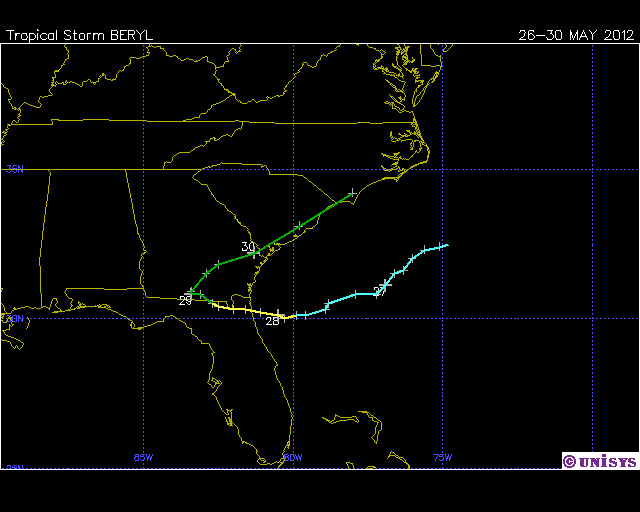

In [317]:
display_an_image(hd['Tropical Storm BERYL']['photo'])

In [318]:
def draw_hurricane_paths(region,year):
    hd = hurricane_dict(region,year)
    typhoon_class = dict([('SUBTROPICAL DEPRESSION',50),('TROPICAL DEPRESSION',28),('SUBTROPICAL STORM',50),
                          ('TROPICAL STORM',50),('TYPHOON-1',60),('HURRICANE-1',110),('CYCLONE-1',70),
                          ('TYPHOON-2',100),('HURRICANE-2',130),('CYCLONE-2',110),('TYPHOON-3',120),
                          ('HURRICANE-3',120),('CYCLONE-3',140),('TYPHOON-4',130),('HURRICANE-4',150),
                          ('CYCLONE-4',150),('TYPHOON-5',180),('HURRICANE-5',200),('CYCLONE-5',180),
                          ('SUPER TYPHOON-1',220),('SUPER TYPHOON-2',250),('SUPER TYPHOON-3',280),
                          ('SUPER TYPHOON-4',300),('SUPER TYPHOON-5',320)])
    # Set the dimension of the figure
    my_dpi=96
    plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-85,urcrnrlon=180,urcrnrlat=80)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")

    for t in hd:
        table = hd[t]['Data']
        if table.empty==False:
            wind = []
            for i in range(len(table)):
                if table.iloc[i]['WIND'] != '-':
                    wind.append(float(table.iloc[i]['WIND']))
                else:
                    wind.append(typhoon_class[table.iloc[i]['STAT']])
            table['WIND'] = wind
            sizes = [float(z)/float(6) for z in table['WIND']]
            cols = [typhoon_class[w]/314.7 for w in table['STAT']]
            lons = list(table['LON'])
            lats = list(table['LAT'])
            x, y = m(lons, lats)
            m.scatter(x, y, s=sizes,c=cols,cmap="Set1")
 
    plt.text( -170, -80,'Hurricane paths for'+' '+region+' in'+' '+str(year), ha='left', va='bottom', size=20, color='#555555')

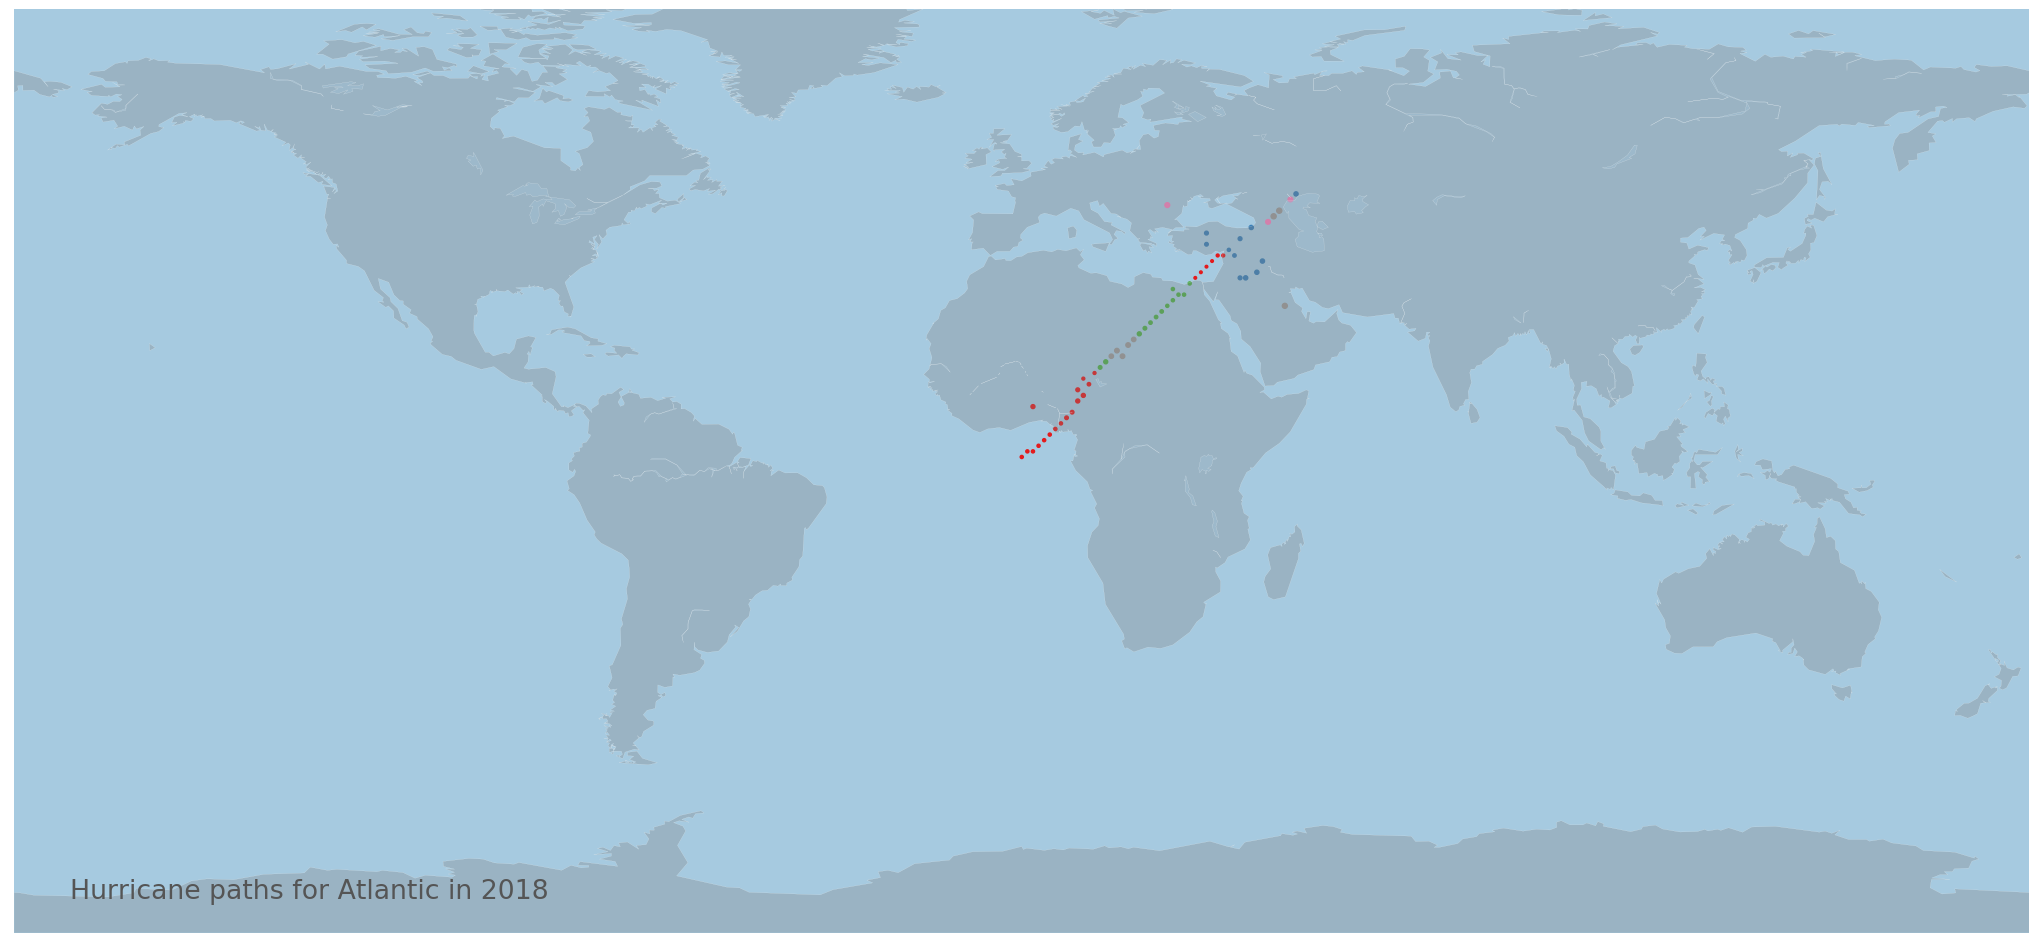

In [319]:
draw_hurricane_paths('Atlantic',2018)

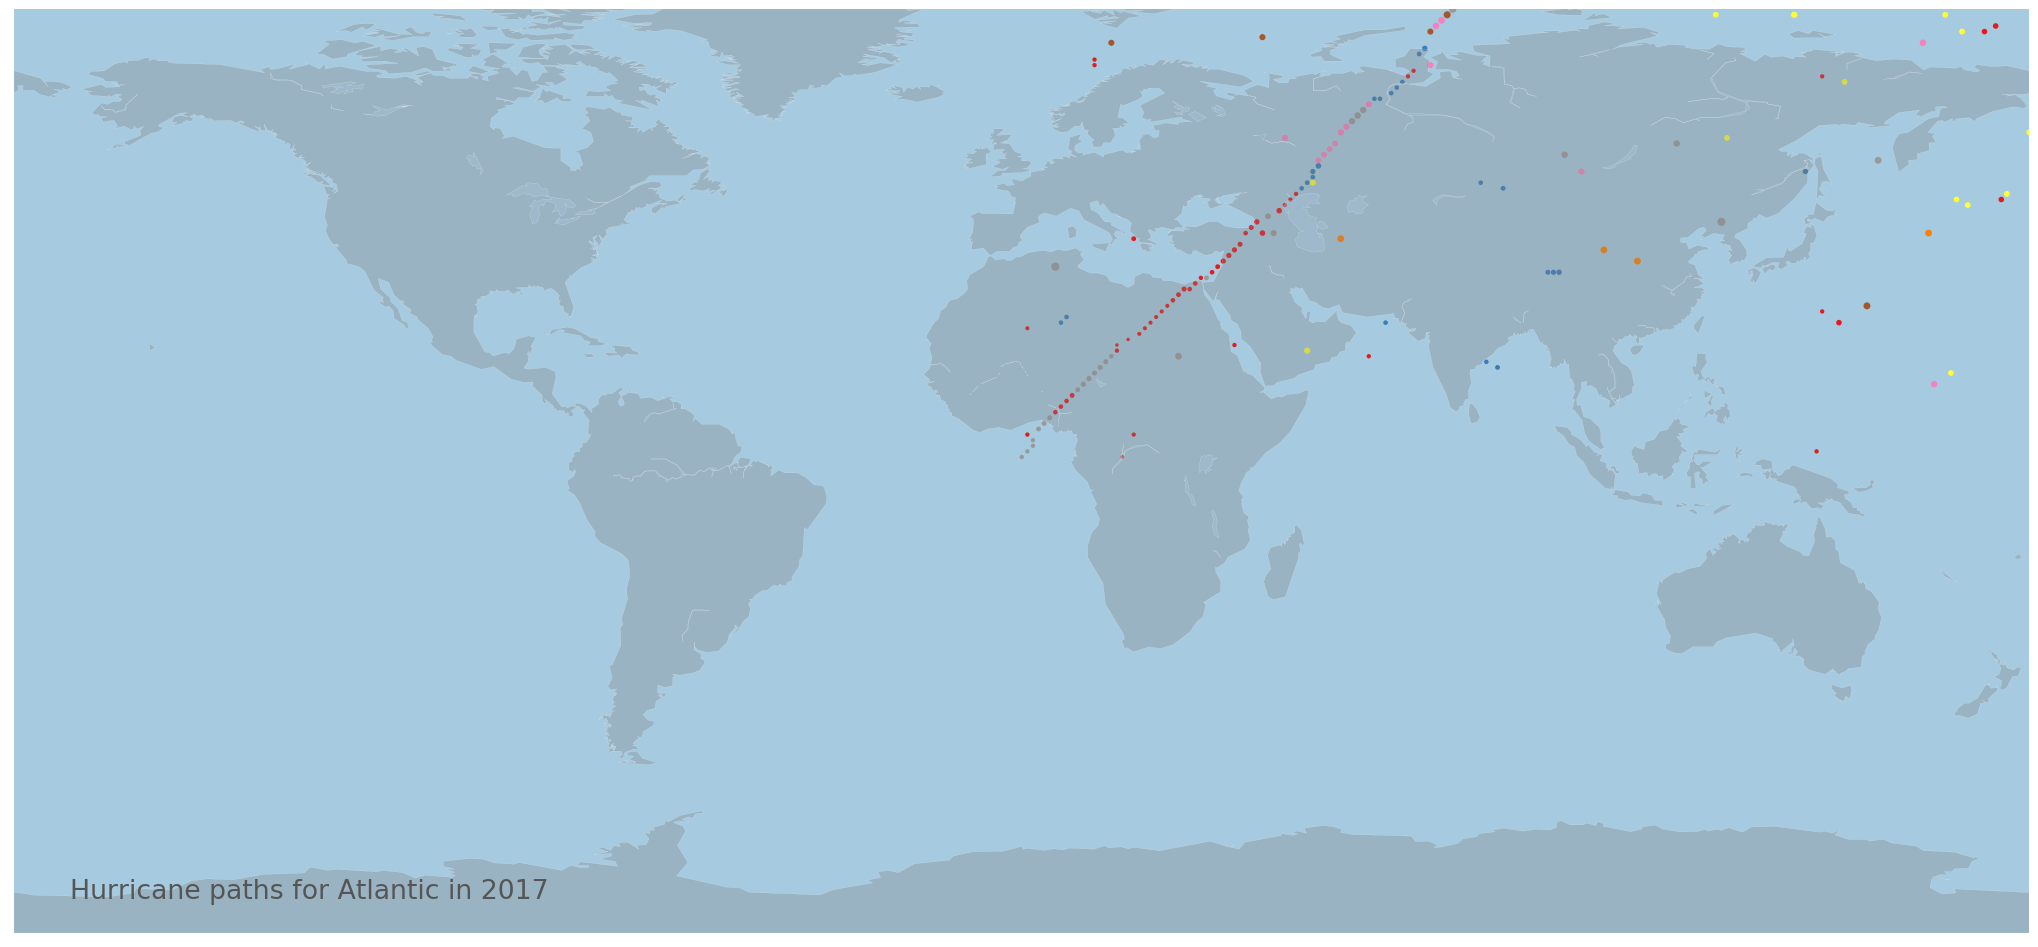

In [320]:
draw_hurricane_paths('Atlantic',2017)

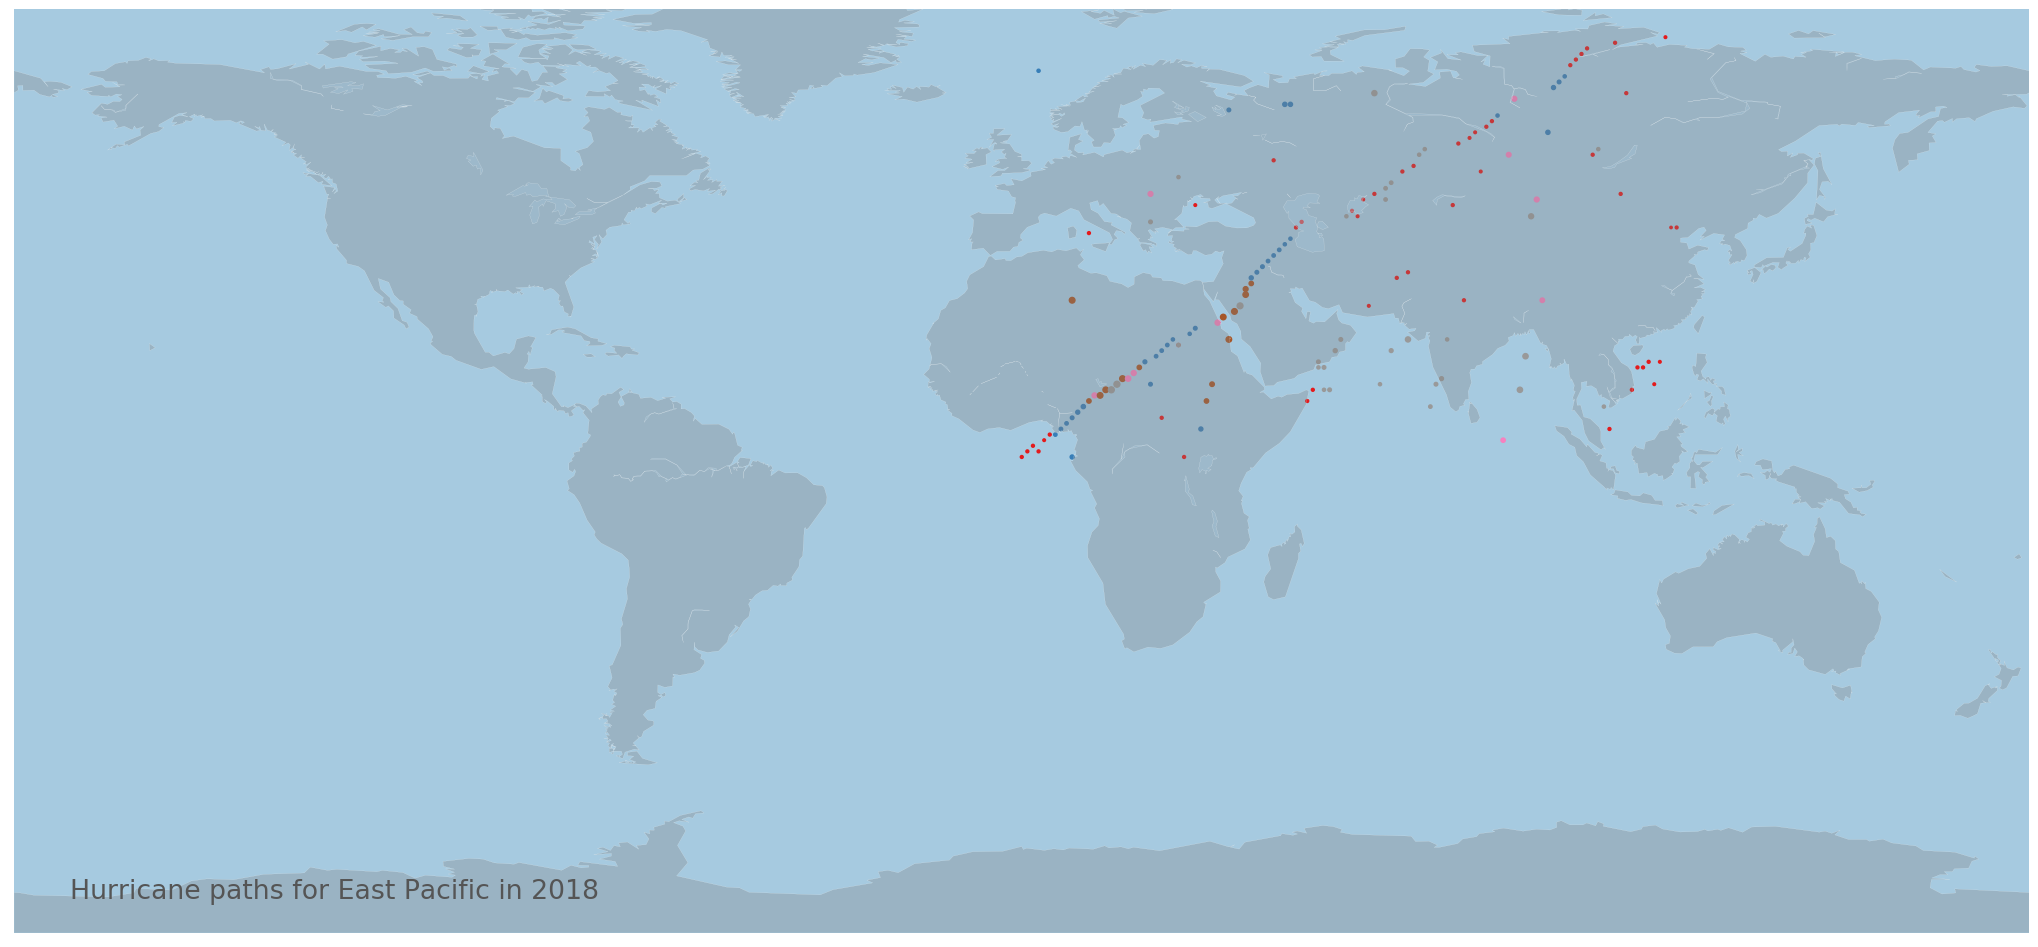

In [321]:
draw_hurricane_paths('East Pacific',2018)

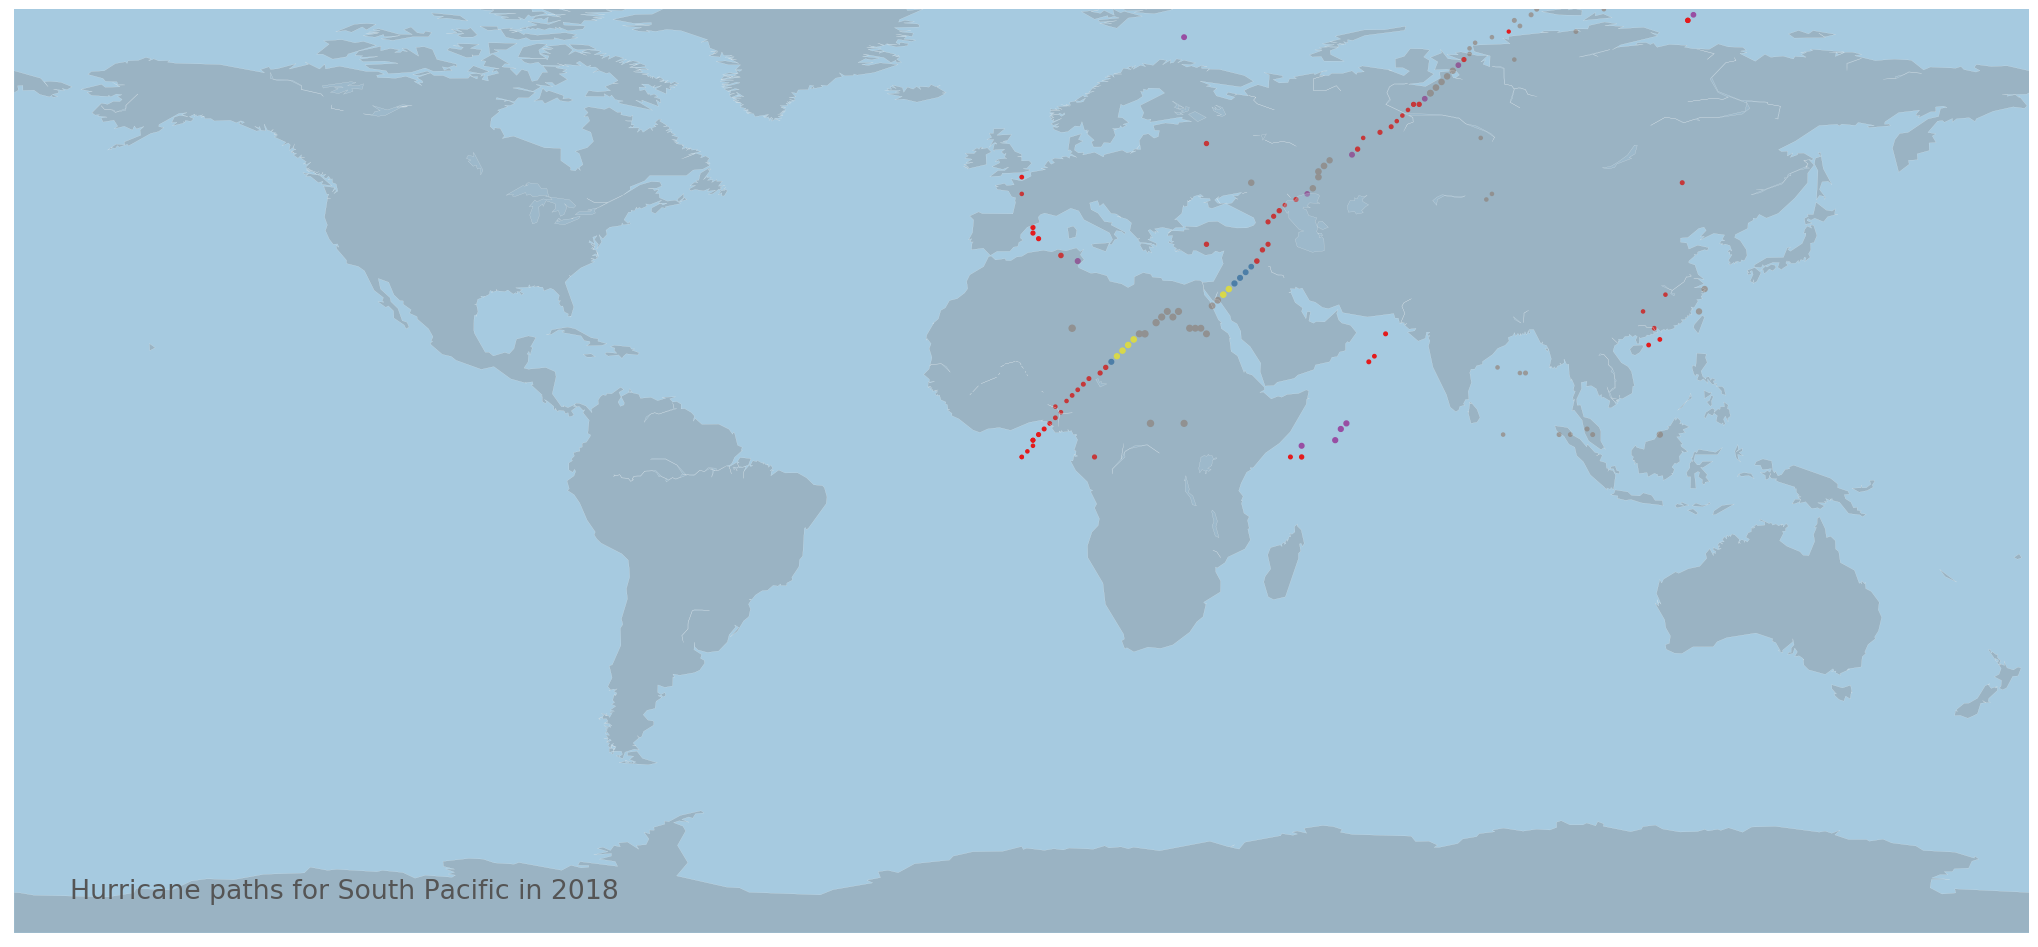

In [322]:
draw_hurricane_paths('South Pacific',2018)

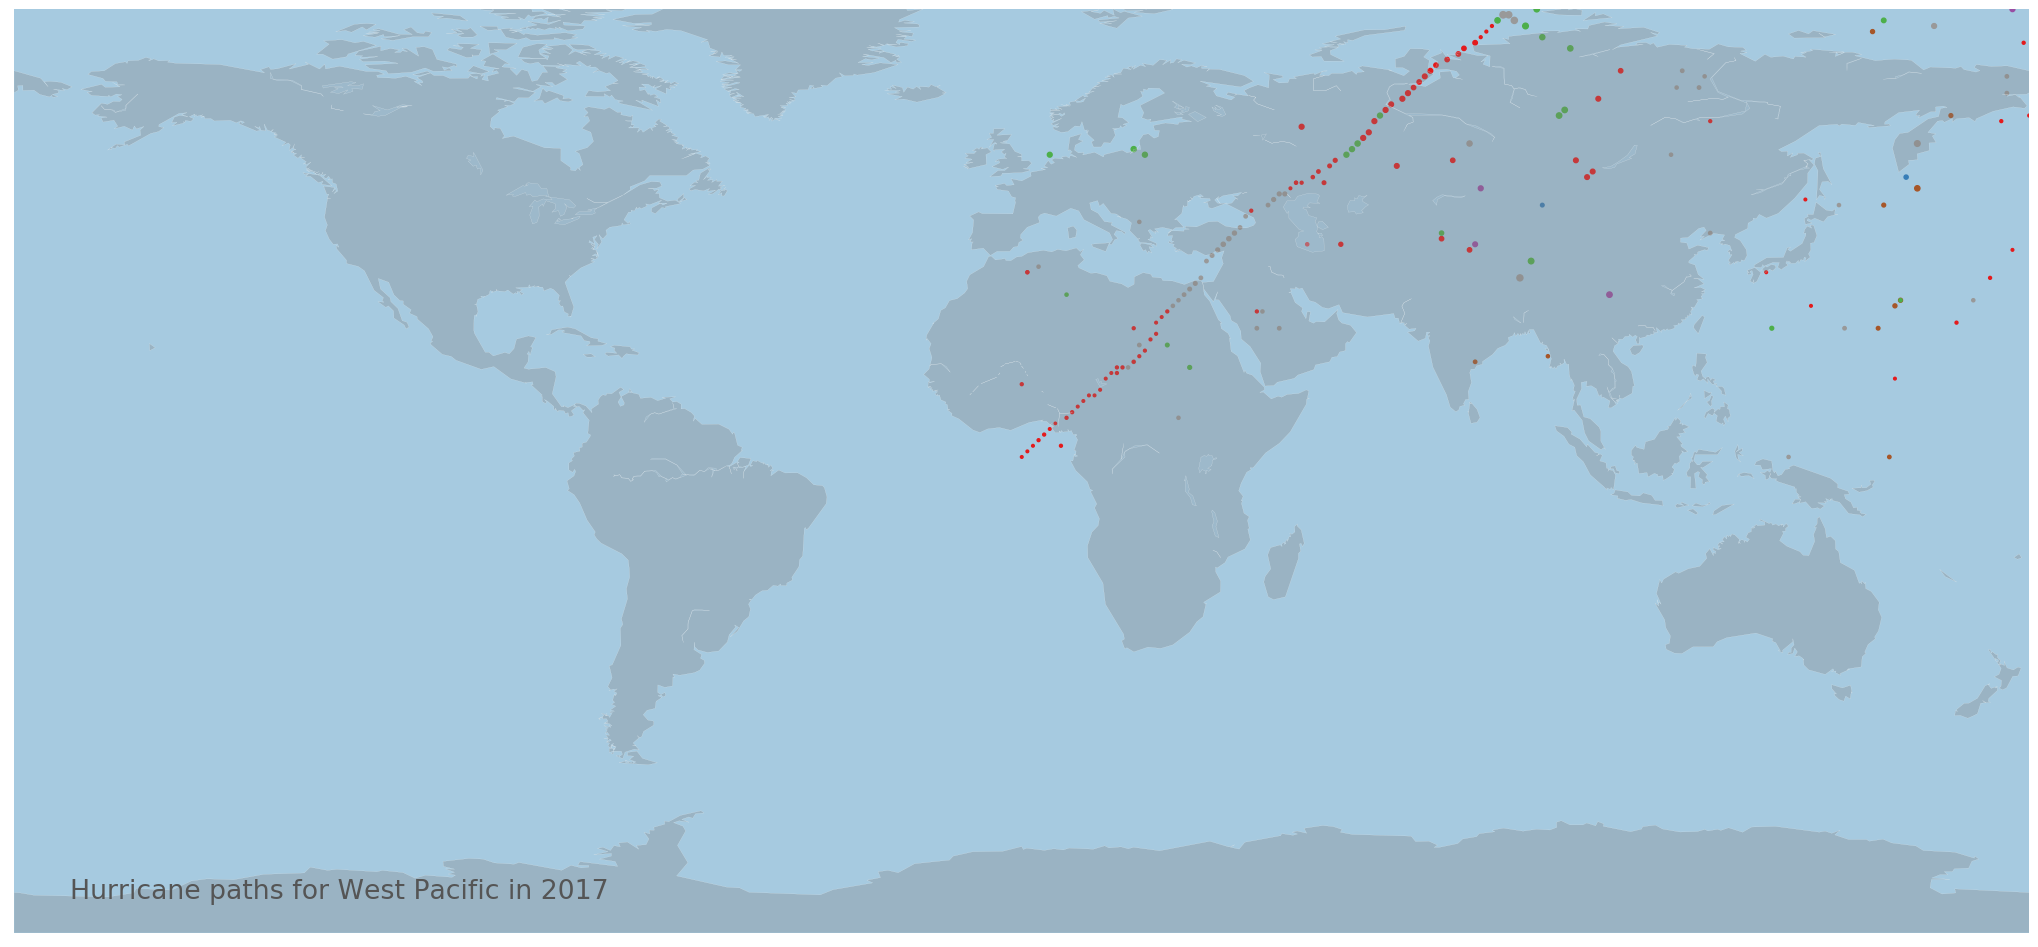

In [323]:
draw_hurricane_paths('West Pacific',2017)

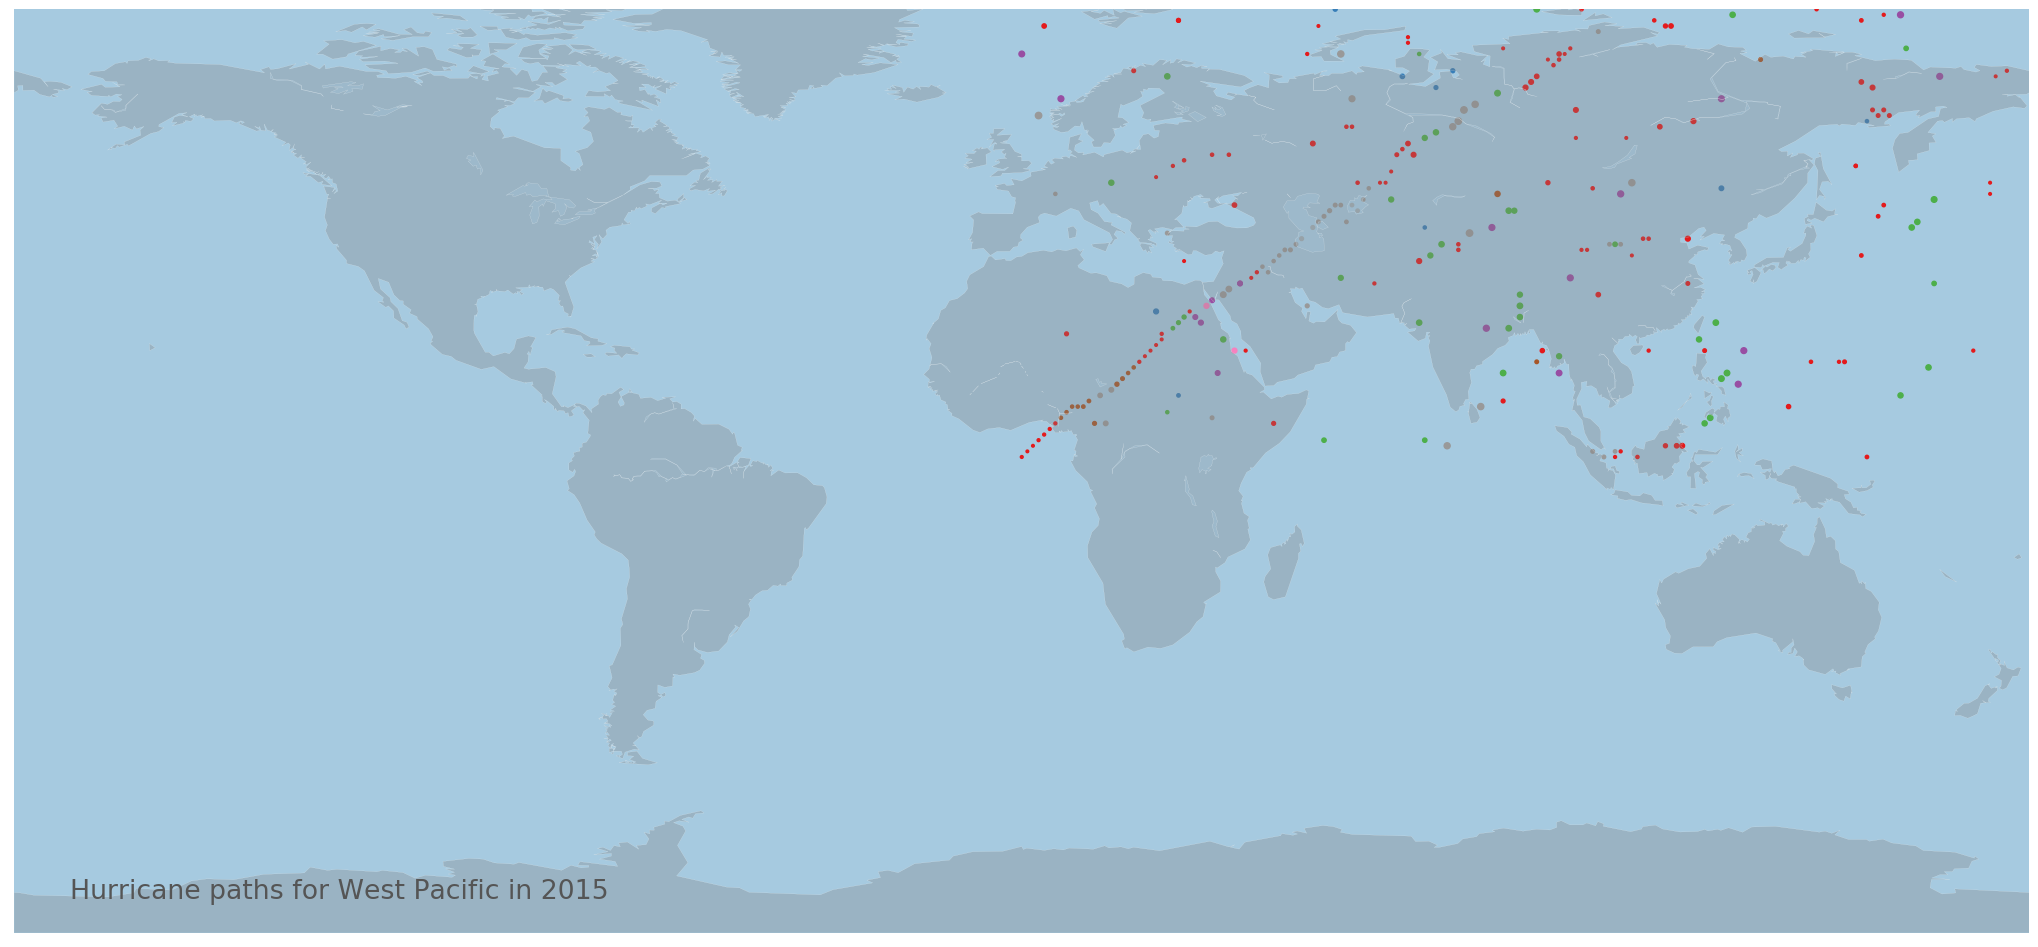

In [324]:
draw_hurricane_paths('West Pacific',2015)

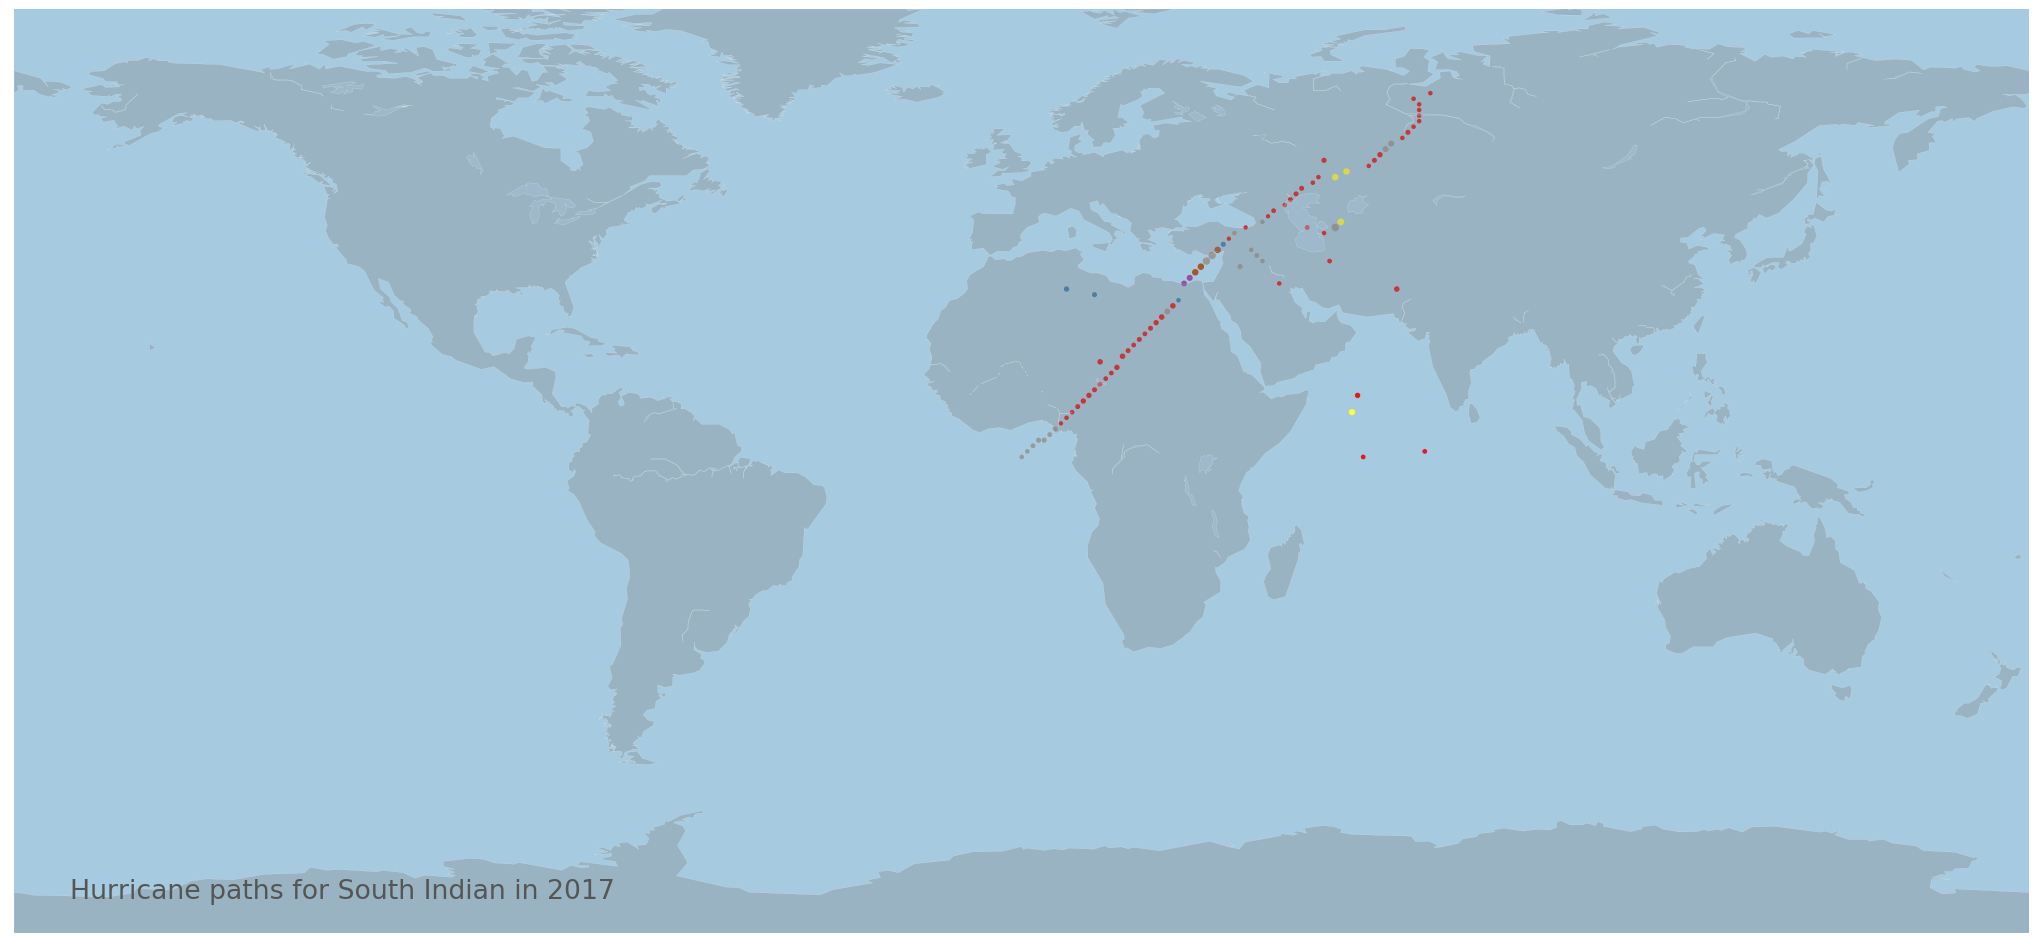

In [325]:
draw_hurricane_paths('South Indian',2017)

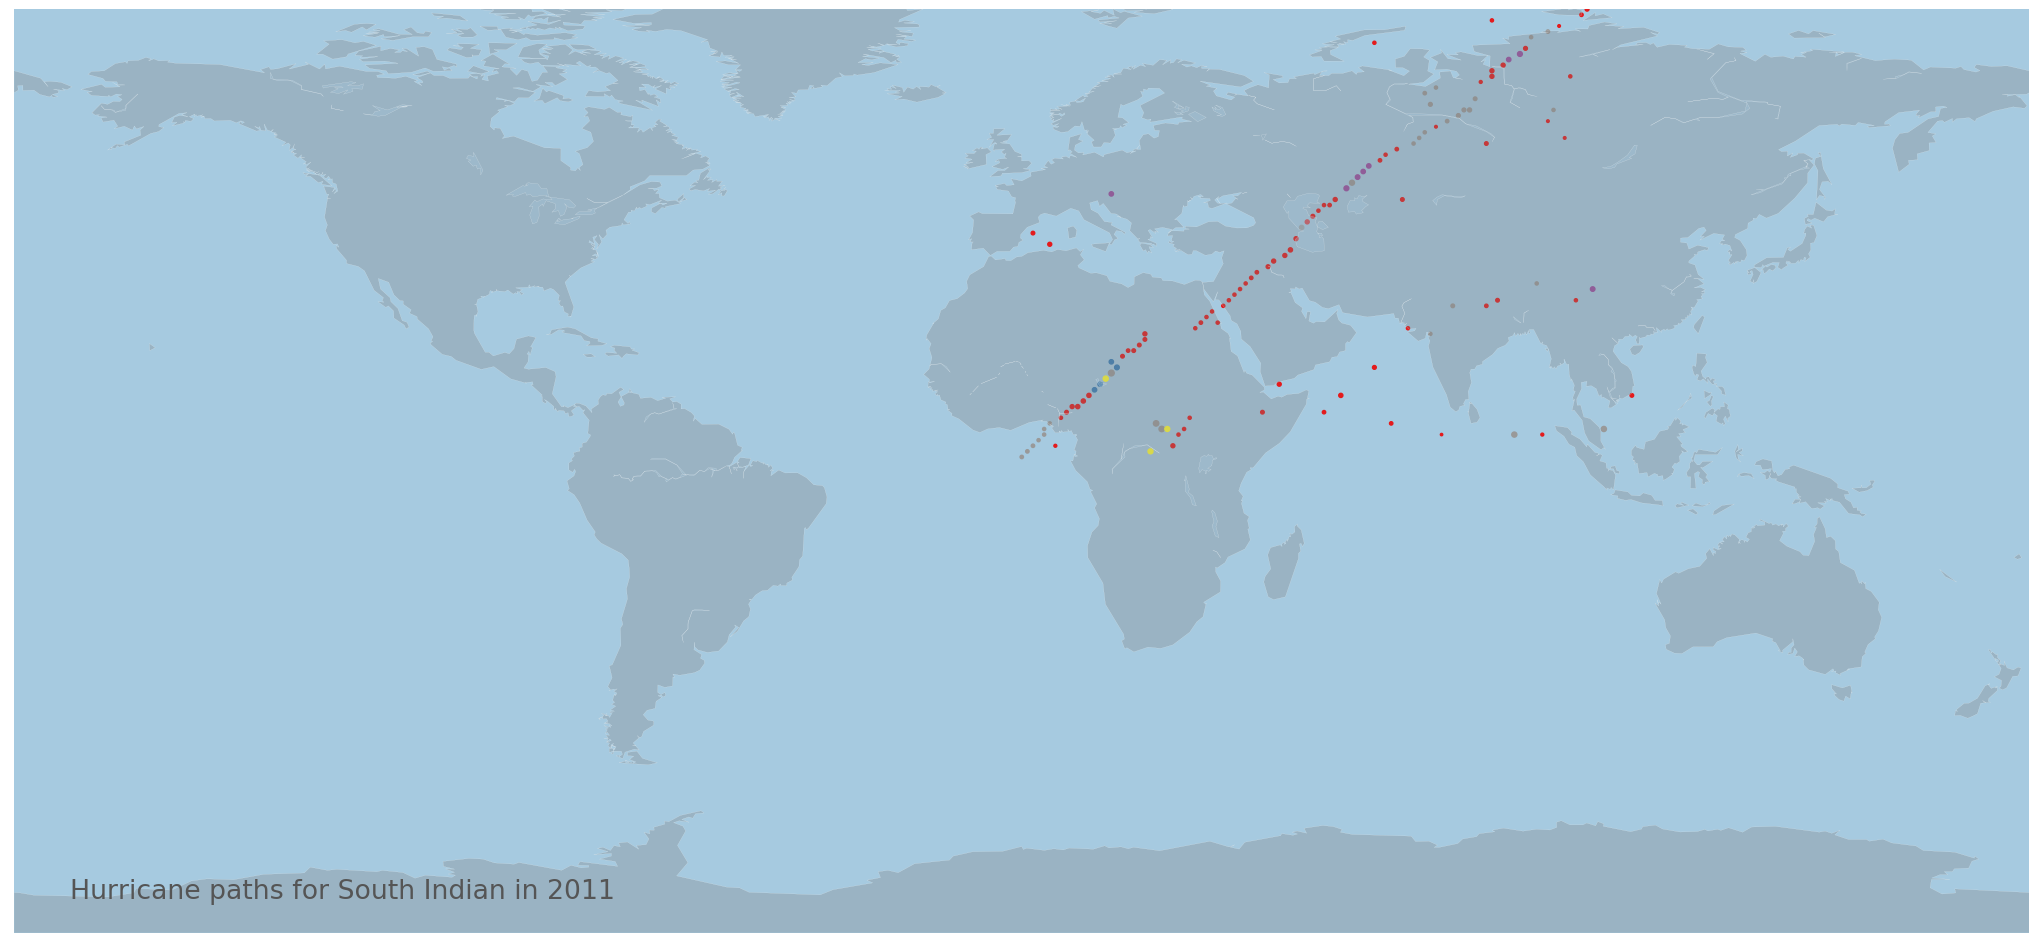

In [326]:
draw_hurricane_paths('South Indian',2011)

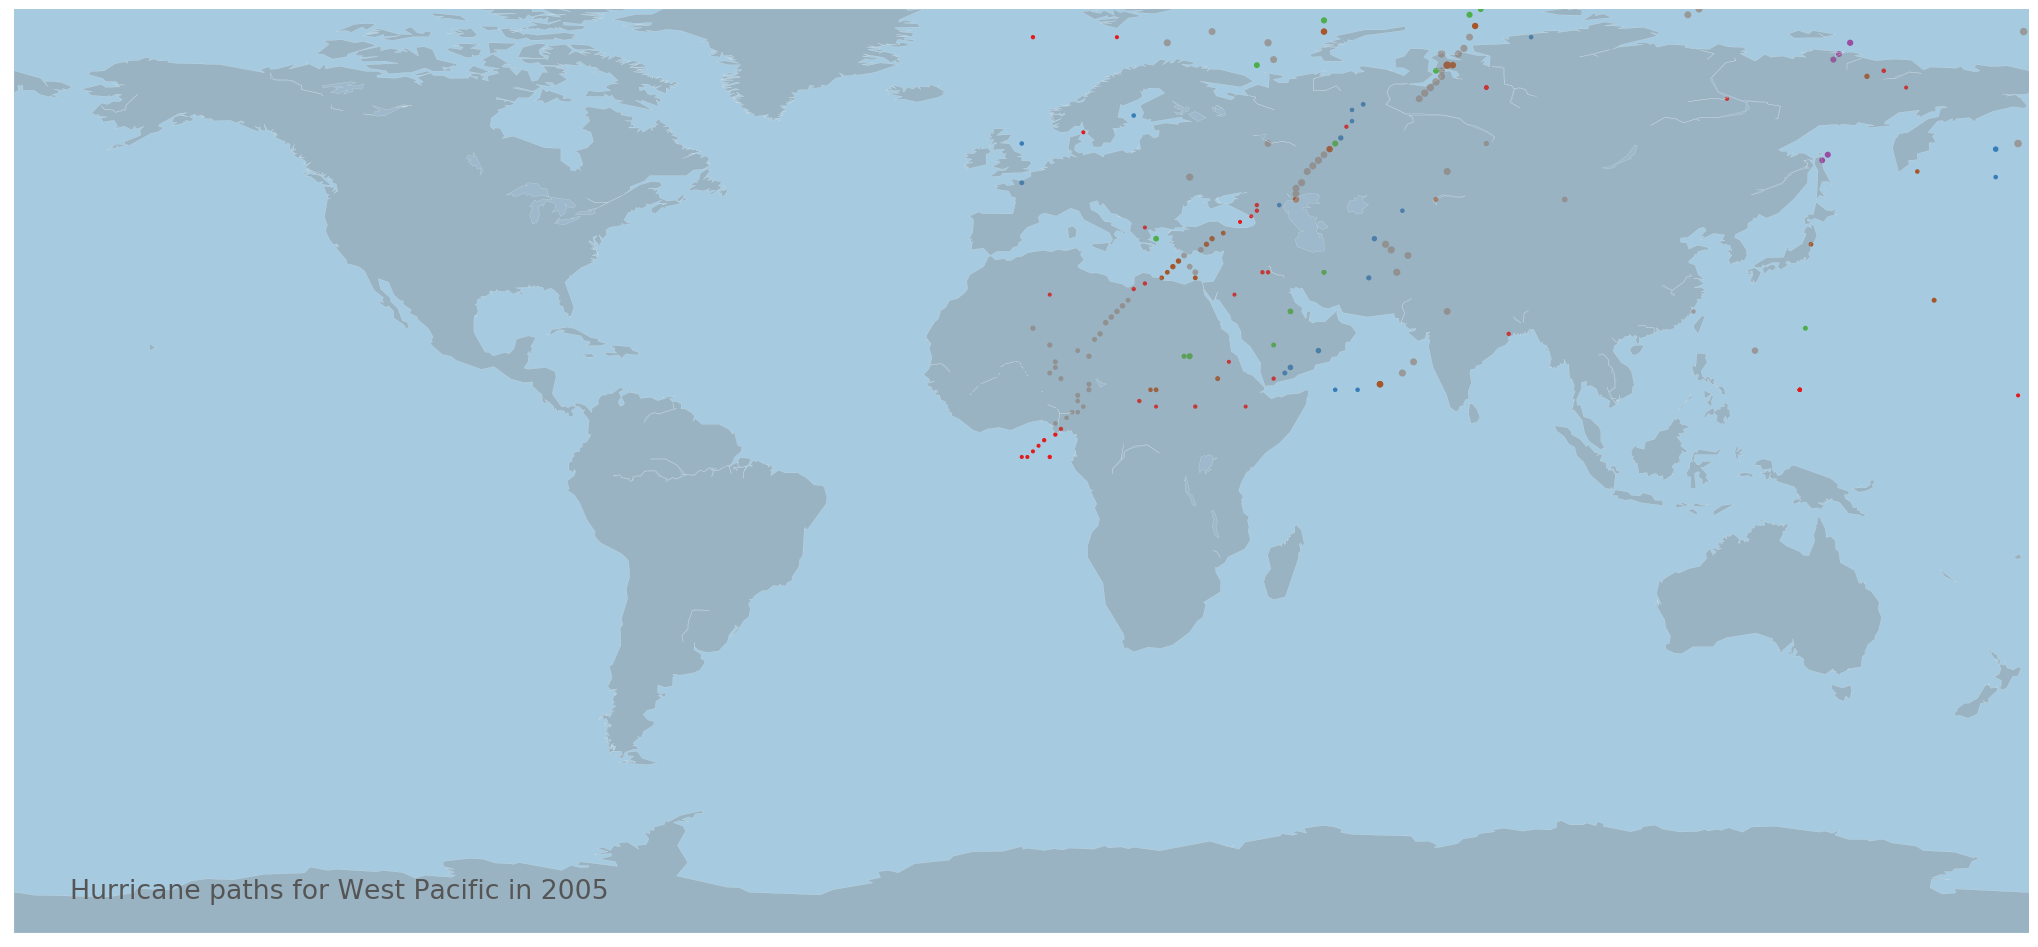

In [327]:
draw_hurricane_paths('West Pacific',2005)

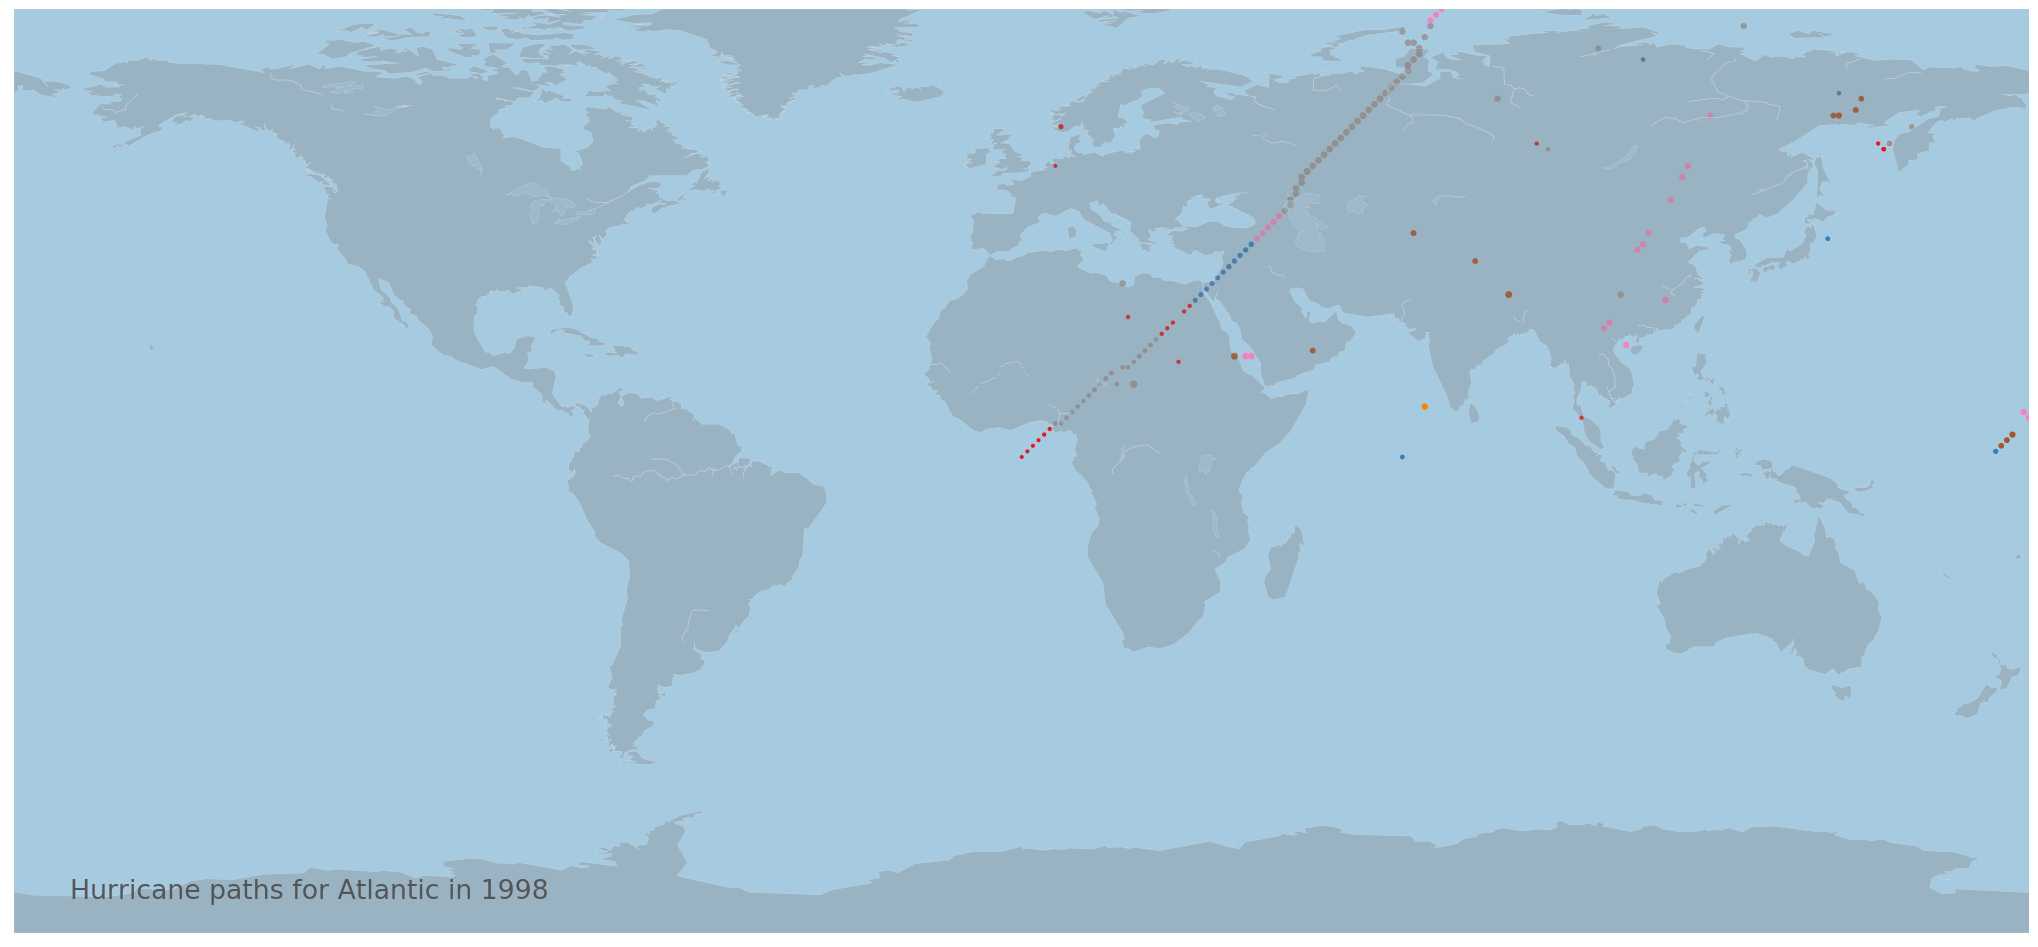

In [329]:
draw_hurricane_paths('Atlantic',1998)